## Data Gathering, Pre-processing and EDA

Here i am going to use tweepy for data extraction

In [20]:
!pip install tweepy

import tweepy
import pandas as pd
import numpy as np
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import Stream
import json
import pandas as pd
import csv
import re #regular expression
import string
import preprocessor as p

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
#OAth Handler or jump server/ reverse proxy server

consumer_key = "zMROP87cgsjuWidcAMVNOgSbk"
consumer_secret ="I4yJ4WiH1ofEtvxABpE3CXZukHn8bgL7lAWU9sXVTkssyXlTem"

#From proxy server we need to connect

access_token = "1465472567272259587-H5gIN692pzRV8BWawafD9Rm2cltErm"
access_token_secret = "HMOj5s1kfUlJYXCtVaNef0VwDMkTT4Tk53s883CYKH1Jb"

In [22]:
#Now the next step is to be connected to jump server of twitter, this can be done with the following command line:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [23]:
#scraping tweets of cryptocurrency (bitcoin) in language mode as English, with taking count of total tweets as 300
public_tweets = api.search_tweets('bitcoin', count=3000, lang='en', tweet_mode='extended')

# Data Pre-processing

In [24]:
#Will now create a pandas dataframe as follows:
df = pd.DataFrame(data=[tweet.full_text for tweet in public_tweets], columns=['original_Tweets'])
df.head(10)

,original_Tweets
0,"RT @JagerskaTimea: Hello friends and family, I..."
1,RT @muneeb: Bitcoin maximalism is limiting the...
2,RT @AirdropStario: 💧 GrailPad Airdrop 💧\n\n🏆 T...
3,Breaking News Rating: 8/10\nCoin Ticker: $ADA\...
4,🐳🚨 Bitcoin Whale Alert: [ TX: d10076a8b747413f...
5,RT @SerkanArikan06: $20000 #Bitcoin To A Rando...
6,RT @saylor: #Bitcoin moves at the speed of lig...
7,"@SquawkStreet @jimcramer @CNBC @jimcramer, for..."
8,@CryptoKaleo The real currency of the United S...
9,And... That's a wrap! 🔥\n\nAll @ElementiesNFT ...


In [25]:
df['len'] = np.array([len(tweet.full_text) for tweet in public_tweets])
df['ID']  = np.array([tweet.id for tweet in public_tweets])
df['Date'] = np.array([tweet.created_at for tweet in public_tweets])
df['Source'] = np.array([tweet.source for tweet in public_tweets])
df['Likes'] = np.array([tweet.favorite_count for tweet in public_tweets])
df['RTs']  = np.array([tweet.retweet_count for tweet in public_tweets])
display(df.head(10))

,original_Tweets,len,ID,Date,Source,Likes,RTs
0,"RT @JagerskaTimea: Hello friends and family, I...",140,1467955684394221568,2021-12-06 20:34:43+00:00,Twitter for Android,0,1
1,RT @muneeb: Bitcoin maximalism is limiting the...,119,1467955684373192705,2021-12-06 20:34:43+00:00,Twitter for Android,0,380
2,RT @AirdropStario: 💧 GrailPad Airdrop 💧\n\n🏆 T...,139,1467955682959839238,2021-12-06 20:34:42+00:00,Twitter for Android,0,15589
3,Breaking News Rating: 8/10\nCoin Ticker: $ADA\...,268,1467955680980131848,2021-12-06 20:34:42+00:00,Beefore App,0,0
4,🐳🚨 Bitcoin Whale Alert: [ TX: d10076a8b747413f...,225,1467955680304848908,2021-12-06 20:34:42+00:00,Bitcoin Whale Alert,0,0
5,RT @SerkanArikan06: $20000 #Bitcoin To A Rando...,99,1467955680258764800,2021-12-06 20:34:42+00:00,Twitter for Android,0,1018
6,RT @saylor: #Bitcoin moves at the speed of lig...,128,1467955680220954636,2021-12-06 20:34:42+00:00,Twitter for iPhone,0,409
7,"@SquawkStreet @jimcramer @CNBC @jimcramer, for...",254,1467955678694285313,2021-12-06 20:34:41+00:00,Twitter for iPhone,0,0
8,@CryptoKaleo The real currency of the United S...,289,1467955678149029893,2021-12-06 20:34:41+00:00,Twitter for Android,0,0
9,And... That's a wrap! 🔥\n\nAll @ElementiesNFT ...,228,1467955677138149376,2021-12-06 20:34:41+00:00,Twitter Web App,0,0


In [26]:
# Now its time to store the data frame in CSV file for further usage.
df.to_csv('bitcointweets.csv')

## Data Cleaning with Using tweet-preprocessor Preprocessor 

Here we will use the data that we have extracted from twitter

In [27]:
!pip install preprocessor

import preprocessor as p

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')
stopwords = stopwords.words('english')
ps= nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kibom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df = pd.read_csv('bitcointweets.csv')
df.head()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs
0,0,"RT @JagerskaTimea: Hello friends and family, I...",140,1467955684394221568,2021-12-06 20:34:43+00:00,Twitter for Android,0,1
1,1,RT @muneeb: Bitcoin maximalism is limiting the...,119,1467955684373192705,2021-12-06 20:34:43+00:00,Twitter for Android,0,380
2,2,RT @AirdropStario: 💧 GrailPad Airdrop 💧\n\n🏆 T...,139,1467955682959839238,2021-12-06 20:34:42+00:00,Twitter for Android,0,15589
3,3,Breaking News Rating: 8/10\nCoin Ticker: $ADA\...,268,1467955680980131848,2021-12-06 20:34:42+00:00,Beefore App,0,0
4,4,🐳🚨 Bitcoin Whale Alert: [ TX: d10076a8b747413f...,225,1467955680304848908,2021-12-06 20:34:42+00:00,Bitcoin Whale Alert,0,0


In [30]:
#displayinf last five rows of dataset
df.tail()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs
94,94,RT @AirdropStario: 💧 OkLetsPlay Airdrop 💧\n\n📍...,140,1467955572276449290,2021-12-06 20:34:16+00:00,Twitter for Android,0,8867
95,95,Virtual Metaverse Plots Outpace Top NFT Collec...,161,1467955570942566403,2021-12-06 20:34:16+00:00,WordPress.com,0,0
96,96,RT @AirdropStario: 💧 Metavast Inu Airdrop 💧\n\...,144,1467955565544591365,2021-12-06 20:34:14+00:00,Twitter Web App,0,16853
97,97,RT @saylor: #Bitcoin moves at the speed of lig...,128,1467955565481500672,2021-12-06 20:34:14+00:00,Twitter for Android,0,409
98,98,@TechAmazing @MiopsTrigger I never thought of ...,287,1467955564495912965,2021-12-06 20:34:14+00:00,Twitter for iPhone,0,0


In [31]:
#To find and fill the missing data in the dataset we will use another function.
#There are 4 ways to find the null values if present in the dataset but we ii use one
df.isnull()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False


In [32]:
df.shape # Check the shape after dropping duplicates

(99, 8)

In [33]:
df.to_csv('bitcointweets2.csv')

# Data analysis of the 3 accounts

In [34]:
#getting my firts account ID
Bill = api.get_user(screen_name = 'BillGates')
Bill.id

50393960

In [35]:
#getting my second account ID
Elon = api.get_user(screen_name = 'elonmusk')
Elon.id

44196397

In [36]:
#getting my third account ID
Hill = api.get_user(screen_name = 'HillaryClinton')
Hill.id

1339835893

In [37]:
#list of the last 20 followers
user = api.get_user(screen_name='elonmusk')

print("User details:")
print(user.name)
print(user.description)
print(user.location)

print("Last 20 Followers:")
for follower in user.followers():
    print(follower.name)

User details:
Elon Musk


Last 20 Followers:
Mert Balkan
Criechipied
Charbel Ibrahim
Mzuvukile Mzaca
mihaila gabriel
Just a Joseph
Göran Wallman
Brgs
propercleanig
Jürgen Niedergassel
Manuel
ezra soler
Vxhjj
Nebojsa Antonic
Nickolas Salas
Toprak
Krypto Kale
Ryan Mignault
tutu li
Stavros Nipyrakis


In [38]:
#list of the last 20 followers
user = api.get_user(screen_name='HillaryClinton')

print("User details:")
print(user.name)
print(user.description)
print(user.location)

print("Last 20 Followers:")
for follower in user.followers():
    print(follower.name)

User details:
Hillary Clinton
2016 Democratic Nominee, SecState, Senator, hair icon. Mom, Wife, Grandma x3, lawyer, advocate, fan of walks in the woods & standing up for our democracy.
New York, NY
Last 20 Followers:
I hate sakura
Ibsaye
Mohamed N.Khalil
Elsa
iiwii151
Popoola Damilare
Nettiereyna8865
Jennifer Battleman
Naomifay6490
Natasha Nanyangwe
Ahamed Deedat
Tom Thomas
سعد ممدوح 316
Emmanuel Okereke
Dian Purusa
Pramir Mallik
Jesús Becerra-Hernández
Bertaariana7011
ОльгаНик
Mohamed


In [39]:
#list of the last 20 followers
user = api.get_user(screen_name='BillGates')

print("User details:")
print(user.name)
print(user.description)
print(user.location)

print("Last 20 Followers:")
for follower in user.followers():
    print(follower.name)

User details:
Bill Gates
Sharing things I'm learning through my foundation work and other interests.
Seattle, WA
Last 20 Followers:
裴轩
Rayhan hossen
SlickRickChesty
Rosalindshana8353
Toprak
Joy Patel
Aboubaker Saddik
Othman Moujtahid
Zekarias
t one
patel dixit
Syeda sameena Banu H.A
Youth Power Uganda-YPU
Irfan Talani
Siddhi Bhandari
Dr. Haythem Gorashi
Oyenola Marvel
Hunnitwayz
Nettiereyna8865
Dr. Elizabeth Neill


In [40]:
#Finding the total number of followers for our accounts
# fetching the user
Bill = api.get_user(screen_name='BillGates')
Elon = api.get_user(screen_name='elonmusk')
Hill = api.get_user(screen_name='HillaryClinton')
  
# fetching the followers_count
Bill_followers_count = Bill.followers_count
Elon_followers_count = Elon.followers_count
Hill_followers_count = Hill.followers_count
  
print("The number of followers of the BILL GATES are : " + str(Bill_followers_count))
print("The number of followers of the ELON MUSK are : " + str(Elon_followers_count))
print("The number of followers of the HILLARY CLINTON are : " + str(Hill_followers_count))

The number of followers of the BILL GATES are : 56347387
The number of followers of the ELON MUSK are : 65620874
The number of followers of the HILLARY CLINTON are : 31059407


In [41]:
#totol number of tweets for our 3 accounts
# fetching the user
Bill = api.get_user(screen_name='BillGates')
Elon = api.get_user(screen_name='elonmusk')
Hill = api.get_user(screen_name='HillaryClinton')
# fetching the statuses_count attribute
Bill_statuses_count = Bill.statuses_count
Elon_statuses_count = Elon.statuses_count 
Hill_statuses_count = Hill.statuses_count 
  
print("The number of Tweets the BILL GATES has posted are : " + str(Bill_statuses_count))
print("The number of Tweets the ELON MUSK has posted are : " + str(Elon_statuses_count))
print("The number of Tweets the HILLARY CLINTON has posted are : " + str(Hill_statuses_count))

The number of Tweets the BILL GATES has posted are : 3731
The number of Tweets the ELON MUSK has posted are : 16229
The number of Tweets the HILLARY CLINTON has posted are : 13036


# EXPLANTION OF THE PROCESS, THE JUSTFACTION BEHIND IT, LESSONS LEARNED AND FINDING

### EXPLANATION OF PROCESS

First step  i installed tweepy and imported to my .ipynb file

Then i connected to My twiiter api using my consumer and access token keys

After the connection was established i tested by using command api.status

Then i extracted data of the last 300 tweets talking about bitcoin

After Data exration i stored it in a csv file where i started analysing

I created a pandas dataframe for my dataset for easy identification

I preprocessed my data

I performed data cleaning and then restore it in another csv file

Wow i started analysing data for the popular accounts that is Elon Musk,Bill Gates and Hillary clinton

### LESSONS LEARNED 
I learned data mining using tweepy library

I learned that there are two versions of twitter API which have diffrent formants

I learned that You can use python tho tweet,retweet,like,unlike block users or do many of the functions a normal user does when using a computer

I learned to preprocess data and analyse it

I learned to clean data checkinf for missing data and dropping tables for missing data
### FINDINS
I analysed data of 3 accounts

i found out that elon musk has the highest number of followers followed by Bill Gates and the HIllary clinton

When i analysed how many they tweeted i realised Hillary clinton was leading followed by bill gates

My assumption was Elon Musk is more popular That Bill Gates and Hillary Clinton






# Network analysis


In [137]:
# printing the latest 10 friends of the BILL GATES
for friend in tweepy.Cursor(api.get_friends, screen_name='BillGates').items(10):
    print(friend.screen_name)

GatesWA
UN_Water
Sida
YoYo_Ma
DrSamira_Asma
WorldDementia
SecVilsack
rodger_voorhies
EUClimateAction
EIB


In [138]:
#creating a network of 10 connections
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('BillGates','GatesWA')
G_symmetric.add_edge('BillGates','UN_Water')
G_symmetric.add_edge('BillGates','Sida')
G_symmetric.add_edge('BillGates','YoYo_Ma')
G_symmetric.add_edge('BillGates','DrSamira_Asma')
G_symmetric.add_edge('BillGates','WorldDementia')
G_symmetric.add_edge('BillGates','rodger_voorhies')
G_symmetric.add_edge('BillGates','EUClimateAction')
G_symmetric.add_edge('BillGates','EIB')

In [139]:
# Number of Nodes and Edges
print(nx.info(G_symmetric))

Graph with 10 nodes and 9 edges


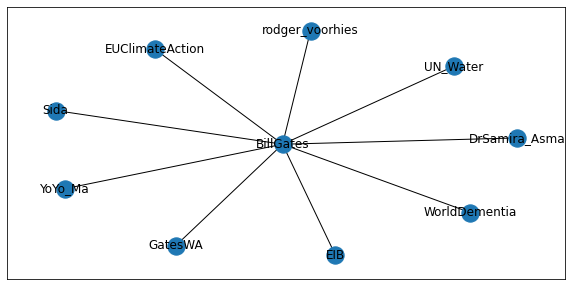

In [140]:
#visualizing the connections  BILL GATES
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
nx.draw_networkx(G_symmetric)

In [141]:
#Degree
nx.degree(G_symmetric,'BillGates')

9

### As we can see Bill gates has worked with only nine actors in the network

# Clustering Coefficient
It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters. We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other. To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

In [142]:
nx.clustering(G_symmetric, 'BillGates')

0

In [143]:
#Average
nx.average_clustering(G_symmetric)

0.0

## Distance
We can also determine the shortest path between two nodes and its length in NetworkX

In [144]:
nx.shortest_path(G_symmetric, 'BillGates', 'EIB')

['BillGates', 'EIB']

#### This show the number of users bill gates will go through to reach EIB in this case this is the shortest distance

In [145]:
nx.shortest_path(G_symmetric, 'WorldDementia', 'rodger_voorhies')

['WorldDementia', 'BillGates', 'rodger_voorhies']

#### We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node

In [146]:

nx.eccentricity(G_symmetric,'BillGates')

1

### Eccentricity of a node A is defined as the largest distance between A and all other nodes .which meand that Bill Gates is connected to every node

## Network Influencers


### Degree Centrality
The people most popular or more liked usually are the ones who have more friends. 
Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections.
NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network

In [147]:
nx.degree_centrality(G_symmetric)

{'BillGates': 1.0,
 'GatesWA': 0.1111111111111111,
 'UN_Water': 0.1111111111111111,
 'Sida': 0.1111111111111111,
 'YoYo_Ma': 0.1111111111111111,
 'DrSamira_Asma': 0.1111111111111111,
 'WorldDementia': 0.1111111111111111,
 'rodger_voorhies': 0.1111111111111111,
 'EUClimateAction': 0.1111111111111111,
 'EIB': 0.1111111111111111}

## Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node

In [148]:
nx.eigenvector_centrality(G_symmetric)

{'BillGates': 0.7071074555358021,
 'GatesWA': 0.23570203561221656,
 'UN_Water': 0.23570203561221656,
 'Sida': 0.23570203561221656,
 'YoYo_Ma': 0.23570203561221656,
 'DrSamira_Asma': 0.23570203561221656,
 'WorldDementia': 0.23570203561221656,
 'rodger_voorhies': 0.23570203561221656,
 'EUClimateAction': 0.23570203561221656,
 'EIB': 0.23570203561221656}

# Betweenness Centrality
It represents the frequency at which a point occurs on the shortest paths that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes.

In [149]:
nx.betweenness_centrality(G_symmetric)


{'BillGates': 1.0,
 'GatesWA': 0.0,
 'UN_Water': 0.0,
 'Sida': 0.0,
 'YoYo_Ma': 0.0,
 'DrSamira_Asma': 0.0,
 'WorldDementia': 0.0,
 'rodger_voorhies': 0.0,
 'EUClimateAction': 0.0,
 'EIB': 0.0}

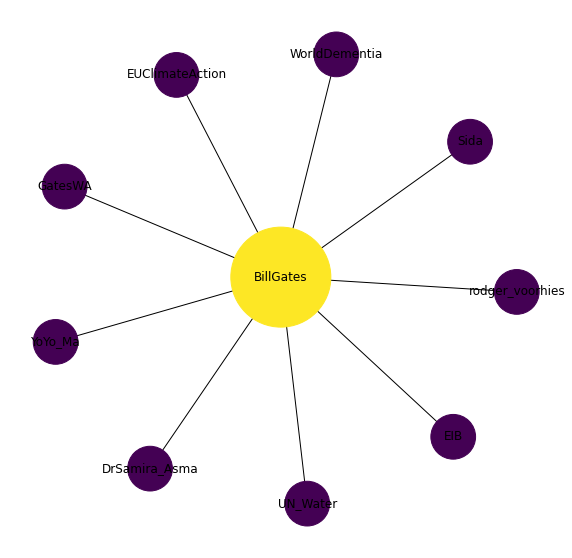

In [150]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [151]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['BillGates', 'GatesWA', 'UN_Water', 'Sida', 'YoYo_Ma']

### The nodes with high betweenness centrality play a significant role in the communication/information flow within the network.

The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function betweenness_centrality() to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not

In [152]:
# printing the latest 10 friends of the ELON MUSK
for friend in tweepy.Cursor(api.get_friends, screen_name='elonmusk').items(10):
    print(friend.screen_name)

EuropaClipper
paraga
TheBabylonBee
BillyM2k
Rainmaker1973
inspiration4x
CNSAWatcher
gigadgets_
slashdot
thesheetztweetz


In [153]:
import networkx as nx1
G_symmetric = nx1.Graph()
G_symmetric.add_edge('elonmusk','EuropaClipper')
G_symmetric.add_edge('elonmusk','paraga')
G_symmetric.add_edge('elonmusk','TheBabylonBee')
G_symmetric.add_edge('elonmusk','BillyM2k')
G_symmetric.add_edge('elonmusk','Rainmaker1973')
G_symmetric.add_edge('elonmusk ','inspiration4x')
G_symmetric.add_edge('elonmusk ','CNSAWatcher')
G_symmetric.add_edge('elonmusk','gigadgets_')
G_symmetric.add_edge('elonmusk','thesheetztweetz')
G_symmetric.add_edge('elonmusk','slashdot')

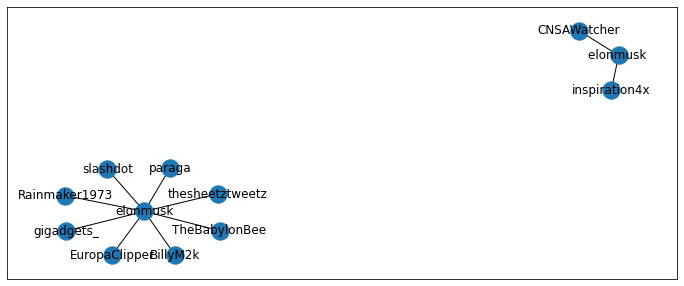

In [154]:
#visualizing the connections for ELON MUSK 
plt.figure(figsize=(12,5))
nx1.draw_networkx(G_symmetric)

In [155]:
#Degree
nx1.degree(G_symmetric,'elonmusk')

8

In [157]:
nx1.clustering(G_symmetric, 'elonmusk')

0

In [158]:
# printing the latest 10 friends of the HILLARY CLINTON
import tweepy
for friend in tweepy.Cursor(api.get_friends, screen_name='HillaryClinton').items(10):
    print(friend.screen_name)

TraceeEllisRoss
BenAffleck
MaEllenSirleaf
SkyGroup
InstituteGC
katrinjak
PrifWeinidog
wmarybeard
SlaughterAM
JustinTrudeau


In [159]:
import networkx as nx2
G_symmetric = nx2.Graph()
G_symmetric.add_edge('HillaryClinton','MaEllenSirlea')
G_symmetric.add_edge('HillaryClinton','SkyGroup')
G_symmetric.add_edge('HillaryClinton','InstituteGC')
G_symmetric.add_edge('HillaryClinton','katrinjak')
G_symmetric.add_edge('HillaryClinton','PrifWeinidog')
G_symmetric.add_edge('HillaryClinton ','wmarybeard')
G_symmetric.add_edge('HillaryClinton ','SlaughterAM')
G_symmetric.add_edge('HillaryClinton','JustinTrudeau')
G_symmetric.add_edge('HillaryClinton','votefwd')
G_symmetric.add_edge('HillaryClinton','tylerperry')

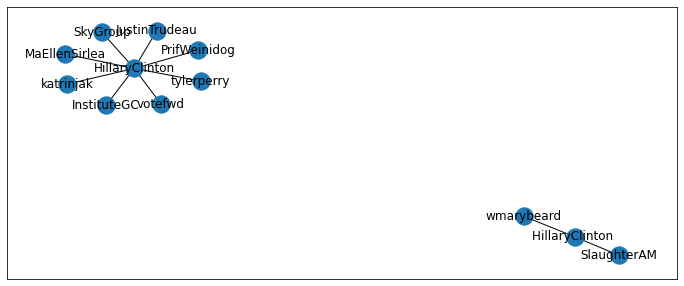

In [160]:
#visualizing the connections for HILLARY CLINTON
plt.figure(figsize=(12,5))
nx2.draw_networkx(G_symmetric)

In [161]:
#Degree
nx2.degree(G_symmetric,'HillaryClinton')

8

## Clustering Coefficient For hillary Clinton Network

In [162]:
nx2.clustering(G_symmetric, 'HillaryClinton')

0

### Degree Centrality

In [163]:
nx2.degree_centrality(G_symmetric)

{'HillaryClinton': 0.7272727272727273,
 'MaEllenSirlea': 0.09090909090909091,
 'SkyGroup': 0.09090909090909091,
 'InstituteGC': 0.09090909090909091,
 'katrinjak': 0.09090909090909091,
 'PrifWeinidog': 0.09090909090909091,
 'HillaryClinton ': 0.18181818181818182,
 'wmarybeard': 0.09090909090909091,
 'SlaughterAM': 0.09090909090909091,
 'JustinTrudeau': 0.09090909090909091,
 'votefwd': 0.09090909090909091,
 'tylerperry': 0.09090909090909091}

### Eigenvector Centrality

In [164]:
nx2.eigenvector_centrality(G_symmetric)

{'HillaryClinton': 0.7071067744546117,
 'MaEllenSirlea': 0.2500000023557931,
 'SkyGroup': 0.2500000023557931,
 'InstituteGC': 0.2500000023557931,
 'katrinjak': 0.2500000023557931,
 'PrifWeinidog': 0.2500000023557931,
 'HillaryClinton ': 6.9721628268841435e-06,
 'wmarybeard': 4.930063614426547e-06,
 'SlaughterAM': 4.930063614426547e-06,
 'JustinTrudeau': 0.2500000023557931,
 'votefwd': 0.2500000023557931,
 'tylerperry': 0.2500000023557931}

#### Betweenness Centrality

In [165]:
nx2.betweenness_centrality(G_symmetric)

{'HillaryClinton': 0.509090909090909,
 'MaEllenSirlea': 0.0,
 'SkyGroup': 0.0,
 'InstituteGC': 0.0,
 'katrinjak': 0.0,
 'PrifWeinidog': 0.0,
 'HillaryClinton ': 0.01818181818181818,
 'wmarybeard': 0.0,
 'SlaughterAM': 0.0,
 'JustinTrudeau': 0.0,
 'votefwd': 0.0,
 'tylerperry': 0.0}

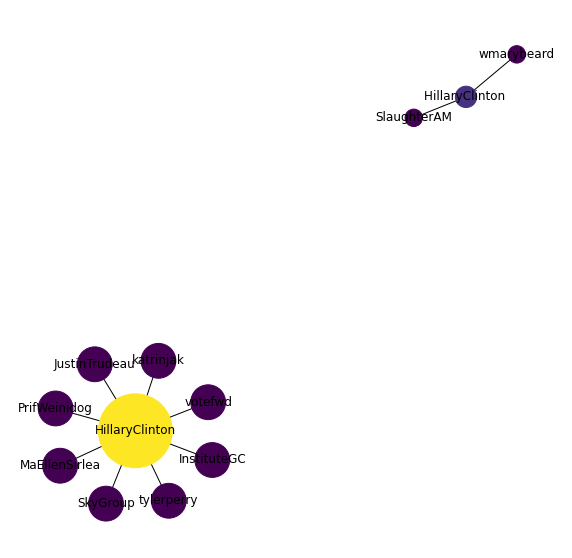

In [166]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

# CONCLUSIONS AND LESSSONS LEARNED

### CONCLUSION

In this task i performed network analysis of my three influencers i.e Bill Gates,Elon Musk and Hillary clinton

First i had to find a number of their friends in this case i only printed 10 as inqured that i hade to used 10 for both

Then i used networkX to graphically represent my data which i mannually reprented 

After calculating the statistics of my influencers my results were

##### Bill Gates
▪ Degree Distribution=9

▪ Cluster coefficient=0

▪ Betweenness Centrality=1.0

▪ Assortativity=0.7071074555358021
##### Hillary clinton
▪ Degree Distribution=8

▪ Cluster coefficient=0

▪ Betweenness Centrality=0.01818181818181818

▪ Assortativity= 0.7071067744546117

## LESSONS LEARNED
I learned how to used networkx to represent a particular network 

I learned that Network analysis is an imporntant practice where it make me understand relationshis i.e
Node and Edge ,parent and child

I learned that network analysis easly makes know how much an influencer is populer

I learned that We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality

I learned that The Betweenness Centrality is the centrality of control.
It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points.
It quantifies how many times a particular node comes in the shortest chosen path between two other nodes




